In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/zomato-dataset/zomato.csv


In [2]:
df1 = pd.read_csv('/kaggle/input/zomato-dataset/zomato.csv')
df = df1.copy()

In [3]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
df = df.drop(['address','phone','dish_liked','listed_in(city)','cuisines', 'reviews_list','menu_item'], axis = 1)


Renaming the columns.- Not really required, we can work with the same column names. Will do it individually if required

In [5]:
df.head()

,url,name,online_order,book_table,rate,votes,location,rest_type,approx_cost(for two people),listed_in(type)
0,https://www.zomato.com/bangalore/jalsa-banasha...,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,800,Buffet
1,https://www.zomato.com/bangalore/spice-elephan...,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,800,Buffet
2,https://www.zomato.com/SanchurroBangalore?cont...,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining",800,Buffet
3,https://www.zomato.com/bangalore/addhuri-udupi...,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,300,Buffet
4,https://www.zomato.com/bangalore/grand-village...,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,600,Buffet


Checking rate column for cleaning

In [6]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [7]:
def cleaned_rate(value):

    if(value=='NEW' or value=='-'):
        return np.nan

    else:
        value=str(value).split('/')
        value=value[0]
        # return it by converting it from string to float
        return float(value)
    
df.rate=df['rate'].apply(cleaned_rate)
df.rate.head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [8]:
df.isnull().sum()

url                                0
name                               0
online_order                       0
book_table                         0
rate                           10052
votes                              0
location                          21
rest_type                        227
approx_cost(for two people)      346
listed_in(type)                    0
dtype: int64

In [9]:
df.rate.fillna(df.rate.mean(), inplace=True)
print(df.rate.isnull().sum())
df.dropna(inplace = True)

0


In [10]:
#drop nulls for other columns
df.dropna(inplace=True)
df.head()

,url,name,online_order,book_table,rate,votes,location,rest_type,approx_cost(for two people),listed_in(type)
0,https://www.zomato.com/bangalore/jalsa-banasha...,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,800,Buffet
1,https://www.zomato.com/bangalore/spice-elephan...,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,800,Buffet
2,https://www.zomato.com/SanchurroBangalore?cont...,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining",800,Buffet
3,https://www.zomato.com/bangalore/addhuri-udupi...,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,300,Buffet
4,https://www.zomato.com/bangalore/grand-village...,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,600,Buffet


In [11]:
df.duplicated().sum()

0

Checking approx cost columns for cleaning

In [12]:
df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

We can remove the comma from numbers greater than 1000

In [13]:
def cleaned_approx_cost(value):
    value=str(value)
    if ',' in value:
        value= value.replace(',','')
        return float(value)
    else:
        return float(value)
    
df['approx_cost(for two people)']= df['approx_cost(for two people)'].apply(cleaned_approx_cost)
df['approx_cost(for two people)'].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700., 1400.,  180., 1350., 2200.,
       2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800., 3400.,
         40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,  469.,
         70., 3200.,   60.,  560.,  240.,  360., 6000., 1050., 2300.,
       4100., 5000., 3700., 1650., 2700., 4500.,  140.])

Checking Restaurant type column for cleaning

In [14]:
df['rest_type'].value_counts()

Quick Bites                   19048
Casual Dining                 10275
Cafe                           3687
Delivery                       2587
Dessert Parlor                 2245
                              ...  
Dessert Parlor, Kiosk             2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Quick Bites, Kiosk                1
Sweet Shop, Dessert Parlor        1
Name: rest_type, Length: 93, dtype: int64

Restaurant types with less counts can be converted to a single others category. We will do it for types with numbers less than 1000

In [15]:
restaurant_type=df['rest_type'].value_counts()
type_below_1000=restaurant_type[restaurant_type<1000]
type_below_1000

Beverage Shop                 867
Bar                           686
Food Court                    619
Sweet Shop                    468
Bar, Casual Dining            415
                             ... 
Dessert Parlor, Kiosk           2
Food Court, Beverage Shop       2
Dessert Parlor, Food Court      2
Quick Bites, Kiosk              1
Sweet Shop, Dessert Parlor      1
Name: rest_type, Length: 85, dtype: int64

In [16]:
def cleaned_type(value):
    if(value in type_below_1000):
        return 'Others'
    else:
        return value
    
df['rest_type']=df['rest_type'].apply(cleaned_type)
df['rest_type'].value_counts()

Quick Bites           19048
Casual Dining         10275
Others                 9032
Cafe                   3687
Delivery               2587
Dessert Parlor         2245
Takeaway, Delivery     2016
Bakery                 1141
Casual Dining, Bar     1136
Name: rest_type, dtype: int64

In [17]:
df.head()

,url,name,online_order,book_table,rate,votes,location,rest_type,approx_cost(for two people),listed_in(type)
0,https://www.zomato.com/bangalore/jalsa-banasha...,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,800.0,Buffet
1,https://www.zomato.com/bangalore/spice-elephan...,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,800.0,Buffet
2,https://www.zomato.com/SanchurroBangalore?cont...,San Churro Cafe,Yes,No,3.8,918,Banashankari,Others,800.0,Buffet
3,https://www.zomato.com/bangalore/addhuri-udupi...,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,300.0,Buffet
4,https://www.zomato.com/bangalore/grand-village...,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,600.0,Buffet


Checking location column for cleaning

In [18]:
df['location'].value_counts()

BTM                      5071
HSR                      2496
Koramangala 5th Block    2481
JP Nagar                 2219
Whitefield               2117
                         ... 
West Bangalore              6
Yelahanka                   5
Jakkur                      3
Rajarajeshwari Nagar        2
Peenya                      1
Name: location, Length: 93, dtype: int64

We can follow similar technique for location column as well like type column

In [19]:
res_loc=df['location'].value_counts()
loc_below_500=res_loc[res_loc<500]
loc_below_500

Shivajinagar                     499
Cunningham Road                  491
Domlur                           482
Old Airport Road                 437
Ejipura                          434
Commercial Street                370
St. Marks Road                   343
Koramangala 8th Block            294
Vasanth Nagar                    293
Jeevan Bhima Nagar               268
Wilson Garden                    246
Bommanahalli                     236
Koramangala 3rd Block            216
Kumaraswamy Layout               194
Thippasandra                     191
Nagawara                         187
Basaveshwara Nagar               187
Seshadripuram                    165
Hennur                           159
Majestic                         155
HBR Layout                       153
Infantry Road                    151
Race Course Road                 139
City Market                      122
Yeshwantpur                      119
ITPL Main Road, Whitefield       113
Varthur Main Road, Whitefield    109
S

In [20]:
def cleaned_loc(value):
    if value in loc_below_500 :
        return 'Others'
    else:
        return value
    
df['location']=df['location'].apply(cleaned_loc)
df['location'].value_counts()

Others                   8021
BTM                      5071
HSR                      2496
Koramangala 5th Block    2481
JP Nagar                 2219
Whitefield               2117
Indiranagar              2033
Jayanagar                1916
Marathahalli             1811
Bannerghatta Road        1611
Bellandur                1271
Electronic City          1249
Koramangala 1st Block    1237
Brigade Road             1218
Koramangala 7th Block    1176
Koramangala 6th Block    1129
Sarjapur Road            1049
Ulsoor                   1017
Koramangala 4th Block    1017
Banashankari              906
MG Road                   894
Kalyan Nagar              843
Richmond Road             804
Malleshwaram              724
Frazer Town               720
Basavanagudi              684
Residency Road            674
Brookefield               656
Banaswadi                 645
New BEL Road              644
Kammanahalli              640
Rajajinagar               591
Church Street             569
Lavelle Ro

Checking type column

In [21]:
df['listed_in(type)'].value_counts()

Delivery              25669
Dine-out              17586
Desserts               3559
Cafes                  1703
Drinks & nightlife     1091
Buffet                  871
Pubs and bars           688
Name: listed_in(type), dtype: int64

**Restaurants delivering Online or not**

Text(0.5, 1.0, 'Restaurants delivering Online or not')

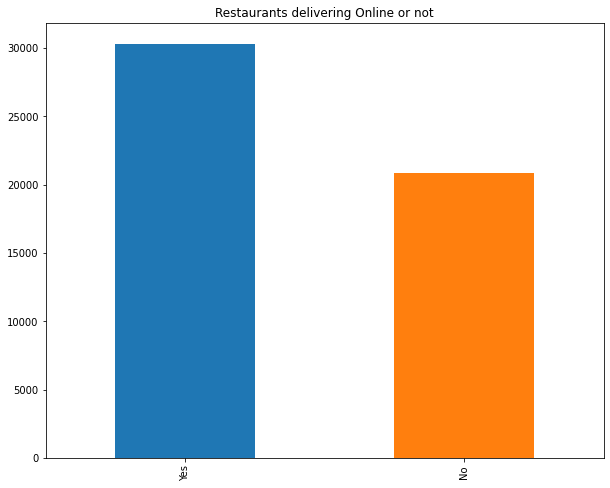

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8)) 
online_counts = df['online_order'].value_counts().plot(kind='bar',color = sns.color_palette())
plt.title("Restaurants delivering Online or not")


**Restaurants allowing table booking or not**

<function matplotlib.pyplot.show(close=None, block=None)>

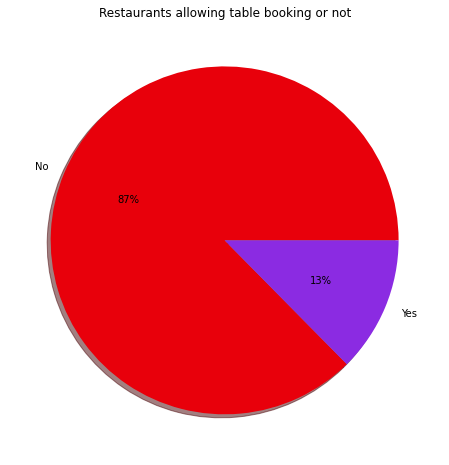

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

table_counts = df['book_table'].value_counts()

colors = sns.color_palette('bright')[3:6]

plt.figure(figsize=(8,8)) 
plt.pie(table_counts.values, labels = table_counts.index, autopct='%1.0f%%',colors = colors,
        shadow = True)
plt.title("Restaurants allowing table booking or not")
plt.show

**Table booking Rate vs Rate**

In [24]:
avg_rate_with_booking = round(df[df['book_table'] == 'Yes']['rate'].mean(), 2)

avg_rate_without_book = round(df[df['book_table'] == 'No']['rate'].mean(), 2)

print('Rating with booking:',avg_rate_with_booking, 'Rating without booking:',avg_rate_without_book)

Rating with booking: 4.13 Rating without booking: 3.64


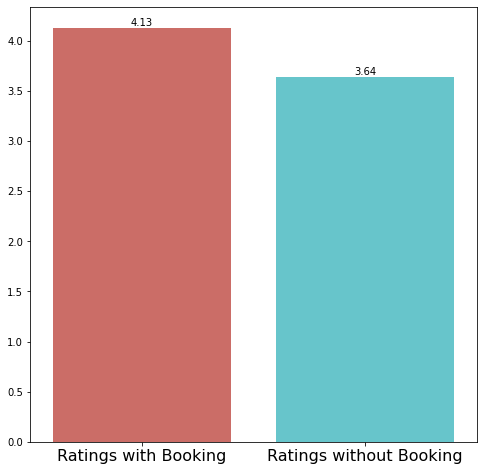

In [25]:
dict1 = {'Ratings with Booking':[avg_rate_with_booking],'Ratings without Booking':[avg_rate_without_book]}
df2 =pd.DataFrame.from_dict(dict1)

fig , ax = plt.subplots(figsize=(8,8))
sns.barplot(data = df2, color = 'blue', palette = 'hls')
ax.set_xticklabels( ax.get_xticklabels(), fontsize = 16)
for i in ax.containers:
    ax.bar_label(i)

**Best Location**

In [26]:
df.describe(include=object)

,url,name,online_order,book_table,location,rest_type,listed_in(type)
count,51167,51167,51167,51167,51167,51167,51167
unique,51167,8726,2,2,35,9,7
top,https://www.zomato.com/bangalore/jalsa-banasha...,Cafe Coffee Day,Yes,No,Others,Quick Bites,Delivery
freq,1,96,30327,44718,8021,19048,25669


In [27]:
pd.set_option("display.max.rows", None)
c = df.groupby('location')['rate'].mean()
loc_df = pd.DataFrame(c)
loc_df['loc_count'] = df['location'].value_counts()
loc_df.sort_values(by=['loc_count', 'rate'],ascending=False).head(10)

,rate,loc_count
location,,
Others,3.655030,8021
BTM,3.601742,5071
HSR,3.682783,2496
Koramangala 5th Block,3.983951,2481
JP Nagar,3.682798,2219
Whitefield,3.644093,2117
Indiranagar,3.817710,2033
Jayanagar,3.768438,1916
Marathahalli,3.581215,1811


BTM is the best location based on number of restaurants since Other category is a mix of location with count less than 500


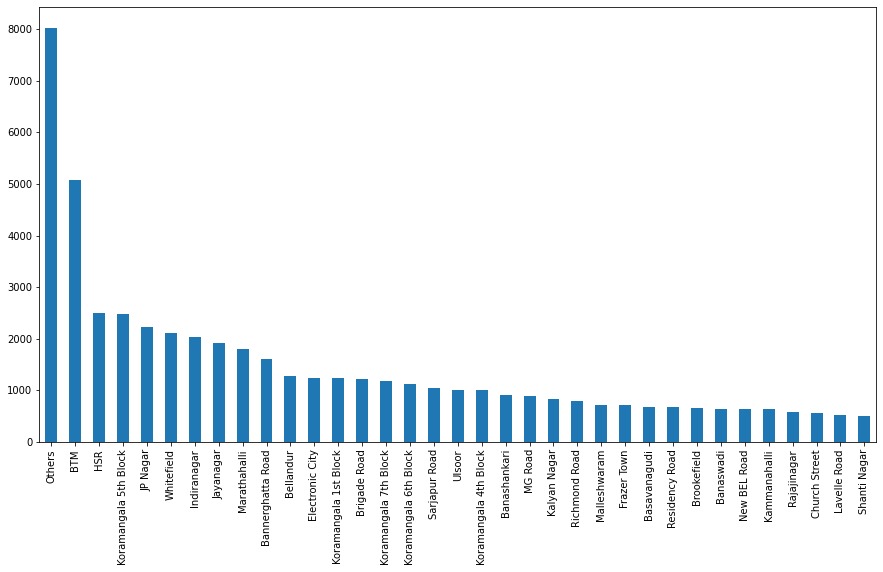

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))

df["location"].value_counts().plot(kind="bar") #top 10 locations based on counts

print('BTM is the best location based on number of restaurants since Other category is a mix of location with count less than 500')

**Relation between Location and Rating**

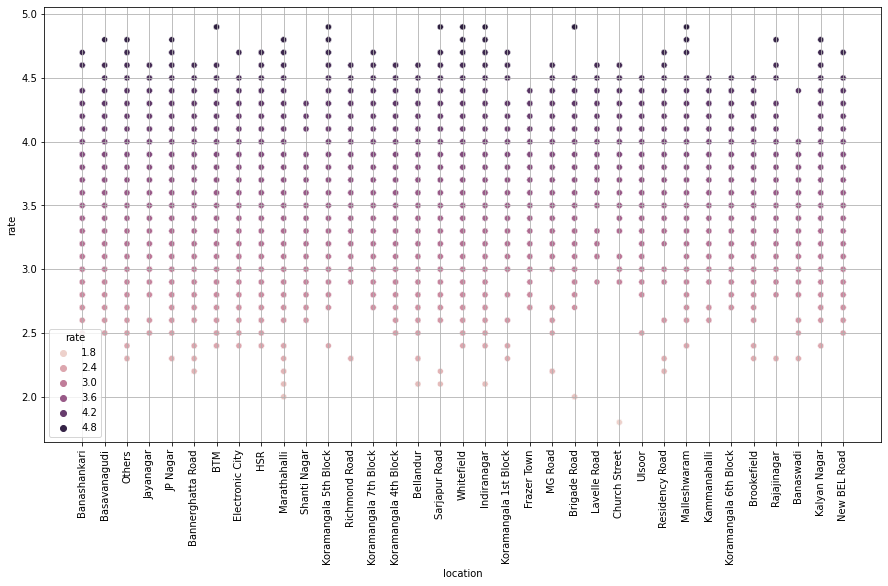

In [29]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=df, x='location', y='rate', hue = 'rate')
plt.xticks(rotation=90)
plt.grid()

**Restaurant Type**

In [30]:
df['rest_type'].value_counts()

Quick Bites           19048
Casual Dining         10275
Others                 9032
Cafe                   3687
Delivery               2587
Dessert Parlor         2245
Takeaway, Delivery     2016
Bakery                 1141
Casual Dining, Bar     1136
Name: rest_type, dtype: int64

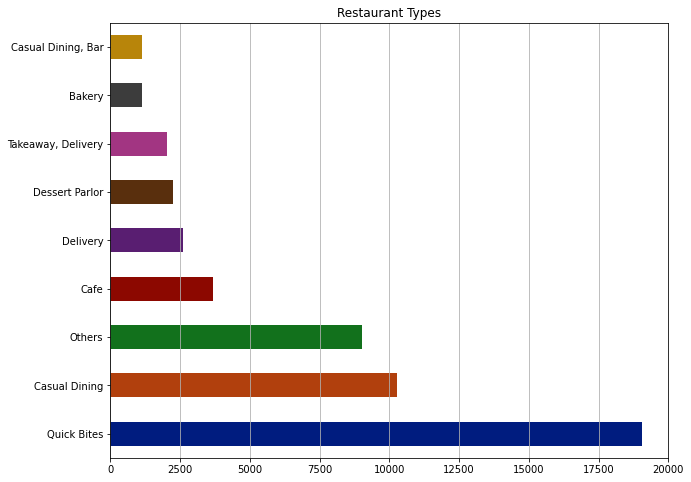

In [31]:
fig , ax = plt.subplots(figsize=(10,8))
df['rest_type'].value_counts().plot(kind="barh",color = sns.color_palette("dark"))
plt.title("Restaurant Types")
plt.grid(axis = 'x')


**Types of Services**

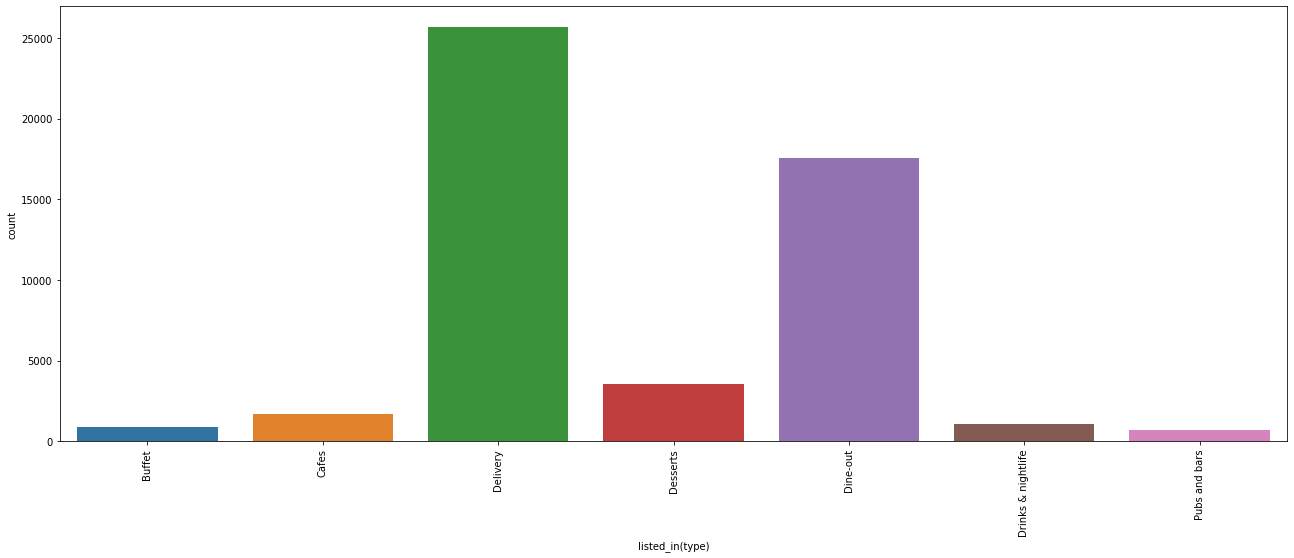

In [32]:
plt.figure(figsize=(22,8))
ax= sns.countplot(x = df['listed_in(type)'])
plt.xticks(rotation=90)
plt.show()

**Relation between Type and Rating**

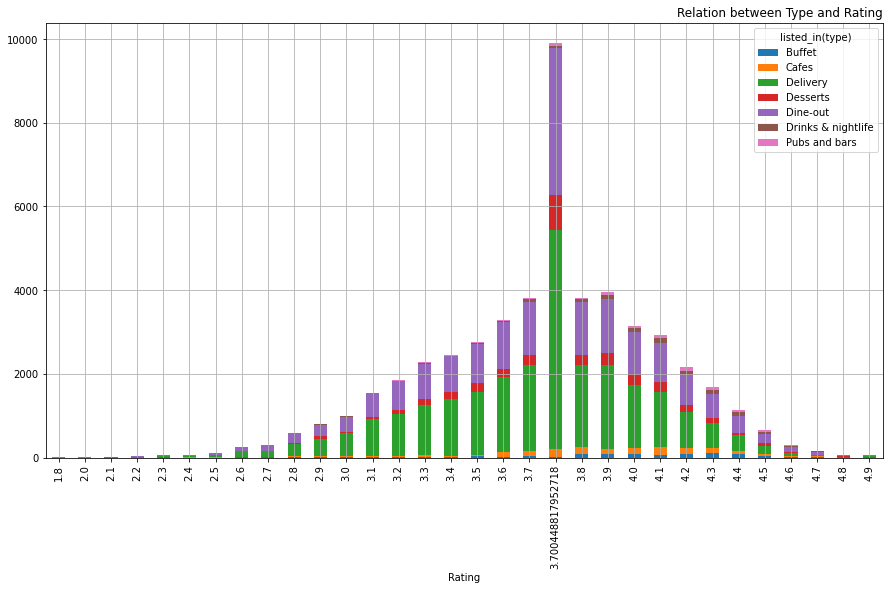

In [33]:
pd.crosstab(df['rate'],df['listed_in(type)']).plot(kind='bar', stacked = True, figsize=(15,8));
plt.title('Relation between Type and Rating',loc = 'right')
plt.xlabel('Rating')
plt.grid()

**Cost of Restaurant**

In [34]:
df['approx_cost(for two people)'].value_counts()

300.0     7549
400.0     6525
500.0     4940
200.0     4846
600.0     3693
250.0     2943
800.0     2285
150.0     2050
700.0     1939
350.0     1752
1000.0    1633
450.0     1415
1200.0     993
100.0      993
1500.0     971
650.0      772
750.0      758
550.0      757
900.0      698
1300.0     516
1100.0     512
1400.0     473
2000.0     363
1600.0     266
1700.0     247
1800.0     203
850.0      166
3000.0     162
2500.0     146
2200.0      78
1900.0      70
2100.0      67
950.0       62
2800.0      45
4000.0      29
3500.0      25
120.0       24
2400.0      23
180.0       20
1350.0      18
3400.0      13
2300.0      11
2600.0      10
80.0        10
230.0       10
1250.0       9
40.0         8
50.0         8
130.0        8
1650.0       6
1450.0       5
199.0        4
330.0        4
4100.0       4
1050.0       4
2700.0       3
70.0         3
6000.0       2
4500.0       2
190.0        2
360.0        2
240.0        2
3200.0       2
140.0        2
560.0        1
60.0         1
5000.0    

Text(0.5, 1.0, 'Average cost(2 people) - Top 10 Restaurants')

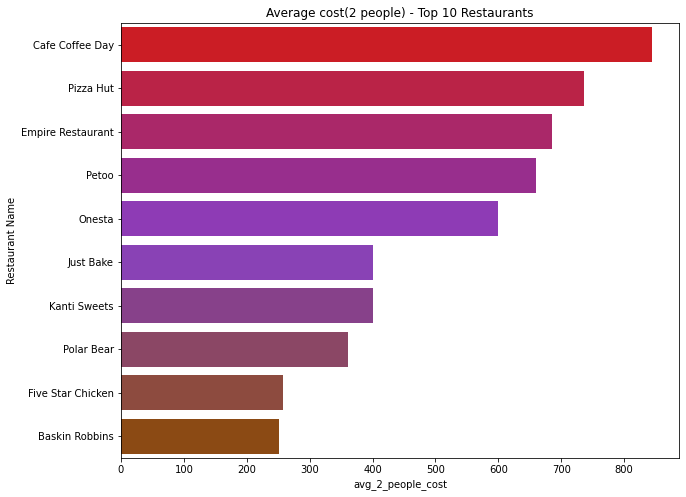

In [35]:
res_cost = df['approx_cost(for two people)'].groupby(df['name'],sort=True)
dict_1={}
for i,j in df['name'].value_counts()[:10].to_dict().items():
    dict_1[i]=round(res_cost.get_group(i).mean(),2)
cost_df = pd.DataFrame(list(dict_1.items()),columns=['Restaurant Name',"avg_2_people_cost"])


fig , ax = plt.subplots(figsize=(10,8))
sns.barplot(data = cost_df.sort_values(by=['avg_2_people_cost'],ascending=False),
            x = 'avg_2_people_cost',y = 'Restaurant Name',palette=sns.blend_palette(colors, n_colors=10))
plt.title('Average cost(2 people) - Top 10 Restaurants')

**No. of restaurants in a Location**

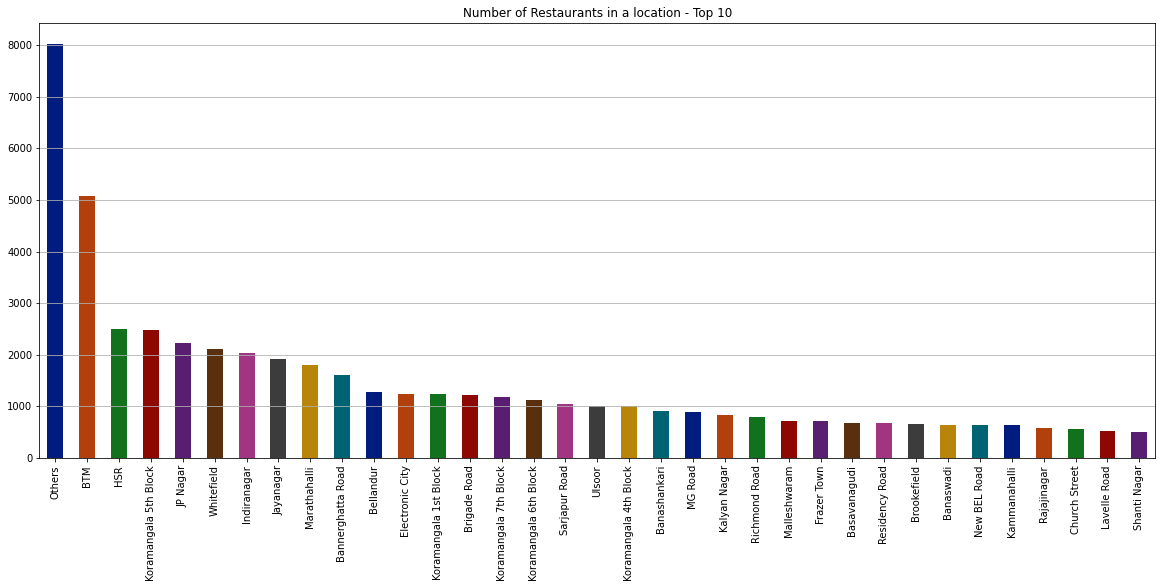

In [36]:
df['location'].value_counts().plot(kind='bar',figsize=(20,8),color = sns.color_palette("dark"))
plt.title('Number of Restaurants in a location - Top 10')
plt.grid(axis = 'y')

**Most famous restaurant chains in Bengaluru**

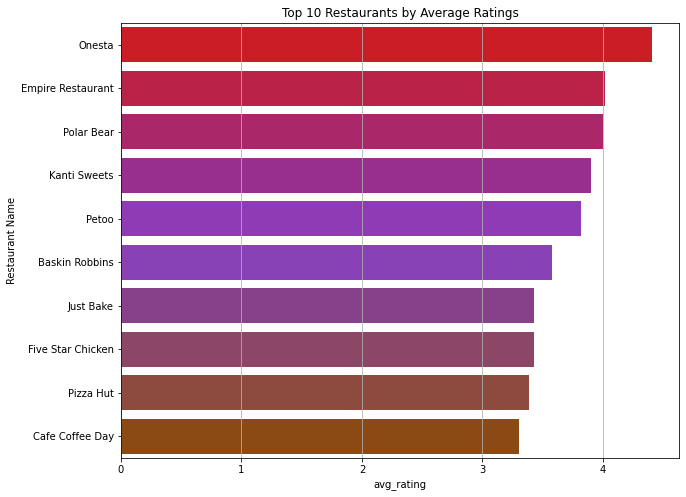

In [37]:
res_chain = df['rate'].groupby(df['name'],sort=True)
dict_2={}
for i,j in df['name'].value_counts()[:10].to_dict().items():
    dict_2[i]=round(res_chain.get_group(i).mean(),2)
cost_df2 = pd.DataFrame(list(dict_2.items()),columns=['Restaurant Name',"avg_rating"])


fig , ax = plt.subplots(figsize=(10,8))
sns.barplot(data = cost_df2.sort_values(by=['avg_rating'],ascending=False),
            x = 'avg_rating',y = 'Restaurant Name',palette=sns.blend_palette(colors, n_colors=10))
plt.title('Top 10 Restaurants by Average Ratings')
plt.grid(axis = 'x')

**Top 10 by Value counts**

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Cafe Coffee Day'),
  Text(1, 0, 'Onesta'),
  Text(2, 0, 'Just Bake'),
  Text(3, 0, 'Empire Restaurant'),
  Text(4, 0, 'Five Star Chicken'),
  Text(5, 0, 'Kanti Sweets'),
  Text(6, 0, 'Petoo'),
  Text(7, 0, 'Polar Bear'),
  Text(8, 0, 'Baskin Robbins'),
  Text(9, 0, 'Pizza Hut')])

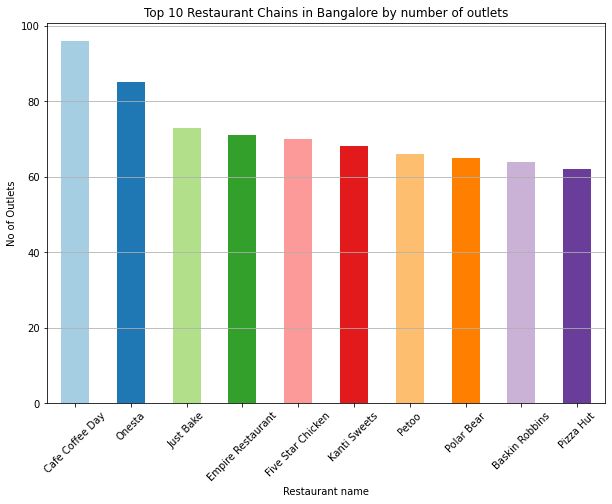

In [38]:
plt.figure(figsize=(10,7))
df['name'].value_counts()[:10].plot(kind = 'bar', color = sns.color_palette("Paired"))
plt.title('Top 10 Restaurant Chains in Bangalore by number of outlets')
plt.xlabel('Restaurant name')
plt.ylabel("No of Outlets")
plt.grid(axis = 'y')
plt.xticks(rotation = 45)

*********************************